In [27]:
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
import dateutil
from dateutil.parser import parse
import csv

In [28]:
#Leitura do arquivo
data = pd.read_csv('data_set.csv')
#Correção no formato da data
data['created_at'] = data['created_at'].apply(dateutil.parser.parse, dayfirst = True)
#Remove as horas da coluna created_at, apenas em tempo de execução
data['created_at'] = data['created_at'].dt.strftime('%Y-%m-%d')

data

,id_str,screen_name,created_at,latitude,longitude,text
0,29292924,queeraspoetry,2018-05-06,19.560340,-154.986600,Good am! 🤙🌋 @ Center for Spiritual Living in H...
1,414227956,NaomiCooper808,2018-05-06,20.020278,-155.667778,"#vacay #Ladat @ Waimea, Hawaii County, Hawai"
2,20112512,vioart527,2018-05-06,19.650000,-155.994000,"Last sunset in Hawaii . . . until next time,"
3,18645703,syvideo,2018-05-06,19.473500,-154.920000,"Adventures of covering lava flow on Hilo, HI. ..."
4,18829708,rodney_o,2018-05-06,19.204109,-155.479005,Breakfast in Pahala. Leftovers and @rustyshawa...
5,493461606,ashleyyyz3,2018-05-06,19.476400,-155.923000,"this is my home now🍃 @ Napoopoo, Hawai"
6,1714726381,itsnotben,2018-05-06,19.431649,-155.216870,"Hawaii, Round 1: 12 hours on an airplane, eart..."
7,606374533,shellokitty78,2018-05-06,19.650000,-155.994000,This little #gecko joined us for a drink. ☺️ @...
8,35835068,chazatronic,2018-05-06,19.594333,-155.971728,#timelapse of the #sunset today 🌅 #Hawaii #hol...
9,414227956,NaomiCooper808,2018-05-06,20.020278,-155.667778,#cousins #ChristensenVaca2018 #TheShaws @ Waim...


In [29]:
#Quantidade de linhas do dataset
data['created_at'].count()

1829

In [30]:
#Data mais antiga
data['created_at'].min()

'2018-04-27'

In [31]:
#Datamais recente
data['created_at'].max()

'2018-05-29'

In [32]:
data['created_at'].unique()

array(['2018-05-06', '2018-05-05', '2018-05-04', '2018-05-03',
       '2018-05-02', '2018-05-01', '2018-04-30', '2018-04-29',
       '2018-04-28', '2018-04-27', '2018-05-29', '2018-05-28',
       '2018-05-27', '2018-05-26', '2018-05-25', '2018-05-24',
       '2018-05-23', '2018-05-22', '2018-05-21', '2018-05-20',
       '2018-05-09', '2018-05-08', '2018-05-07'], dtype=object)

In [33]:
#AgrupamentosS
qkeys = data['created_at'].value_counts()
qkeys.head()

2018-05-01    217
2018-05-04    202
2018-05-06    189
2018-05-05    182
2018-05-07    167
Name: created_at, dtype: int64

In [34]:
#Criando os grupos de datas pra ser o pivô dos grupos
keys = data.groupby(['created_at']).groups.keys()
keys

dict_keys(['2018-04-27', '2018-04-28', '2018-04-29', '2018-04-30', '2018-05-01', '2018-05-02', '2018-05-03', '2018-05-04', '2018-05-05', '2018-05-06', '2018-05-07', '2018-05-08', '2018-05-09', '2018-05-20', '2018-05-21', '2018-05-22', '2018-05-23', '2018-05-24', '2018-05-25', '2018-05-26', '2018-05-27', '2018-05-28', '2018-05-29'])

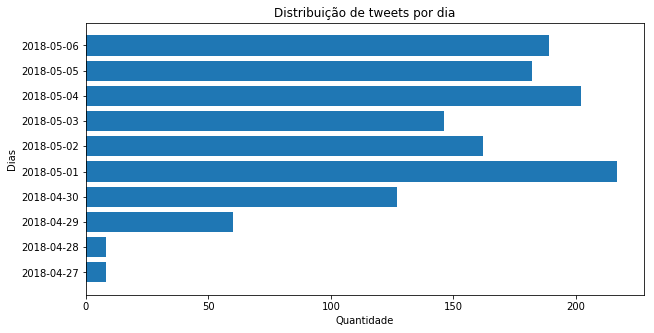

In [35]:
#Plot da distribuição dos tweets por dia -> Ok

tkeys = data.groupby('created_at').count()

objects = [[],[]]

qtdbars = 10

for index, row in tkeys.iterrows():
    objects[0].append(row['id_str'])
    objects[1].append(index)

y_pos = np.arange(len(objects[1][:qtdbars]))

plt.figure(figsize=(10, 5))
plt.barh(y_pos, objects[0][:qtdbars], align='center')

plt.yticks(y_pos, objects[1][:qtdbars])
plt.xlabel('Quantidade')
plt.ylabel('Dias')
plt.title('Distribuição de tweets por dia')
 
plt.show()


In [36]:

#Agrpamento por dia... Tweets agrupados e separados em arquivos com as datas correspondentes
# -> Ok
for find in keys:
    
    out = csv.writer(open("Grupos/Grupo - " + find + ".csv","w"))
    out.writerow(
        ['text']
    )
        
    for line in csv.DictReader(open('data_set.csv')):
        
        dt = parse(line['created_at'])
        dt = dt.strftime('%Y-%m-%d')
        
        if find == dt:
            out.writerow([line['text']])



In [37]:
#Teste de leitura dos grupos -> Ok
import os, re, string
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk import  RegexpTokenizer
from nltk.tokenize import TweetTokenizer
                

#Função Estável
def remove_dots(text):
    return  re.compile(
        f'[{re.escape(string.punctuation)}]'
    ).sub(u'', text)


def regex_clean_noises(text):
    return ' '.join(
        [t for t in text.strip().split() if re.match(r'[^\W\d]*$', t)]
    )

def regex_clean(text):
    return  regex_clean_noises(
        ' '.join(RegexpTokenizer(r'\w+').tokenize(text)).lower()
    )



def stopwords_clean(text):
    make = TweetTokenizer()
    flag = make.tokenize(text)
    stop_words = set(stopwords.words('english')) 
    
    print("> ", flag)
    tokens = flag

    filtered_sentence = [w for w in tokens if not w in stop_words]

    return filtered_sentence


def frequency_all():
    
    data_plot = [[],[]]
    
    counter = Counter()

    for line in os.listdir('Grupos'):

        for kem in csv.DictReader(open('Grupos/'+line)):
            counter.update(
                stopwords_clean(kem['text'])
            )

    for tag, count in counter.most_common(20):
        #condição pra passar somente palvras formadas com mais de 2 letras
        if len(tag) > 2:
            data_plot[0].append(tag)
            data_plot[1].append(count)
            
    return data_plot        
            
def frequency_perday():

    data_plot = []
    
    for line in os.listdir('Grupos'):
        
        counter = Counter()
        flag = [[],[]]

        for kem in csv.DictReader(open('Grupos/'+line)):
            counter.update(
                stopwords_clean(kem['text'])
            )

        for tag, count in counter.most_common(3):
            flag[0].append(tag)
            flag[1].append(count)
        data_plot.append([line[7:18],flag])
        
            #condição pra passar somente palvras formadas com mais de 2 letras


    return data_plot

def plot_words(data_plot):
    
    indexes = np.arange(len(data_plot[0]))
    plt.figure(figsize = (10, 5))
    plt.xticks(indexes, data_plot[0], rotation = 90)
    plt.bar(indexes, data_plot[1] , align='center') 
    
def plot_words_perday(data_plot):
    
    stop = 4
    count = 0
    
    fig, axs = plt.subplots(1, stop, figsize=(20, 5), sharey=True)
    
    for title, line in data_plot:
        plt.rc('font', size=15)  
        axs[count].bar(line[0], line[1])
        axs[count].set_title(title)
        count += 1
        
        if count == stop:
            break;
'''
plot_words(
    frequency_all()
)

plot_words_perday(
    frequency_perday()
)
'''



print(remove_dots("Good am! 🤙🌋 @ !!Cen@ter ????///--__for Spiritual Living in H..."))


Good am 🤙🌋  Center for Spiritual Living in H


In [40]:
import folium
from folium import plugins

hawaii = folium.Map(location = [19.643392, -155.369082], zoom_start = 7.5)
hawaii



lat = data['latitude']
long = data['longitude']

mapa = folium.Map(location=[19.433409, -155.287767],zoom_start=7.5)
 
for la,lo in zip(lat,long):
    folium.Marker([la, lo]).add_to(mapa)
 
mapa

In [ ]:
coordenadas = []
mapa = folium.Map(location=[19.433409, -155.287767],tiles='Stamen Toner',zoom_start=7.5)

for la,lo in zip(lat,long):
    coordenadas.append([la,lo])
 
mapa.add_child(plugins.HeatMap(coordenadas))
mapa

In [ ]:
k = Counter()
for line in data['text']:
    k.update(str(line).split())

In [ ]:
for line, c in k.most_common():
    if "sismo" == line:
        print(line,'>>',c)